Sarthak Jamdar        (B237101)

Apurva Sorte          (B237104)

Prathamesh Koparde    (B237091)

# **Importing Libraries**

In [ ]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

sns.set(font_scale=1.3)
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **Dataset download using API**

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "sj0204"
os.environ["KAGGLE_KEY"] = "6bcc5eac1605840b6c3d0554b8965d04"

In [ ]:
!kaggle datasets download -d rtatman/glove-global-vectors-for-word-representation

 98% 448M/458M [00:05<00:00, 104MB/s]
100% 458M/458M [00:05<00:00, 83.7MB/s]


https://www.kaggle.com/datasets/rtatman/glove-global-vectors-for-word-representation

In [ ]:
!unzip glove-global-vectors-for-word-representation.zip

Archive:  glove-global-vectors-for-word-representation.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.50d.txt        


In [ ]:
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 165MB/s]


https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

In [ ]:
!unzip emotions-dataset-for-nlp.zip

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [ ]:
df_train = pd.read_csv('/content/train.txt', names=['Text', 'Emotion'], sep=';')

df_val = pd.read_csv('/content/val.txt', names=['Text', 'Emotion'], sep=';')

df_test = pd.read_csv('/content/test.txt', names=['Text', 'Emotion'], sep=';')

In [ ]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
print(df_train.shape)

(16000, 2)


In [ ]:
df_test.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
print(df_test.shape)

(2000, 2)


In [ ]:
df_val.head()

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
print(df_val.shape)

(2000, 2)


# **Train Dataset**

In [ ]:
df_train.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [ ]:
df_train.Emotion.value_counts() / df_train.shape[0] *100

joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: Emotion, dtype: float64

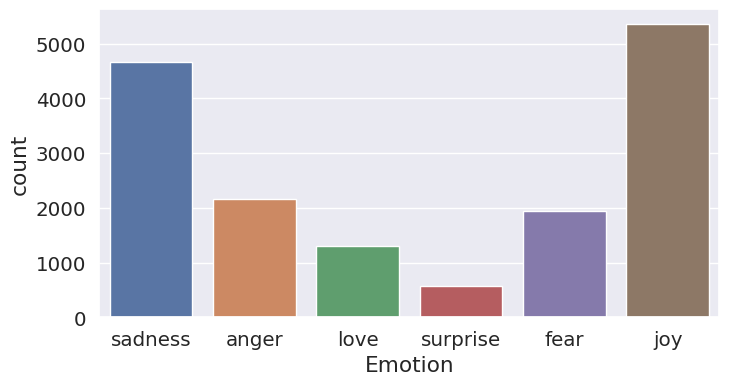

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_train);

In [ ]:
#print the number of null values in each column
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
#print the number of duplicated values
df_train.duplicated().sum()

1

In [ ]:
#removing duplicated values
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [ ]:
#print some of those rows to check
df_train[df_train['Text'] == df_train.iloc[7623]['Text']]

,Text,Emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In [ ]:
df_train[df_train['Text'] == df_train.iloc[14313]['Text']]

,Text,Emotion
13653,i could feel myself hit this strange foggy wall,fear
14313,i could feel myself hit this strange foggy wall,surprise


In [ ]:
#removing duplicated text
index = df_train[df_train['Text'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [ ]:
#Count the number of stopwords in the data
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: stop_words, dtype: int64

<Axes: ylabel='Frequency'>

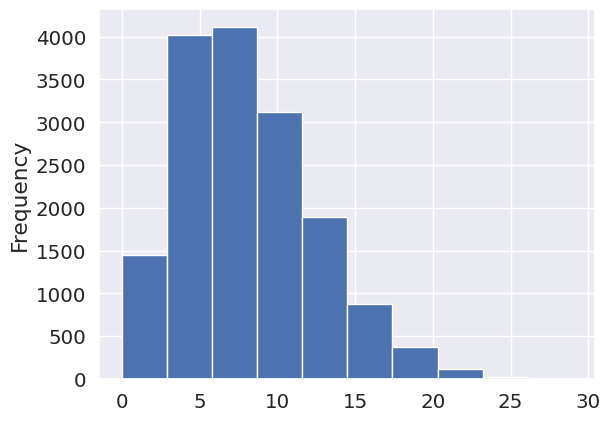

In [ ]:
#distribution of stopwords visually
temp['stop_words'].plot(kind= 'hist')

# **Test dataset**

In [ ]:
#check if the data is balanced or not
df_test.Emotion.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

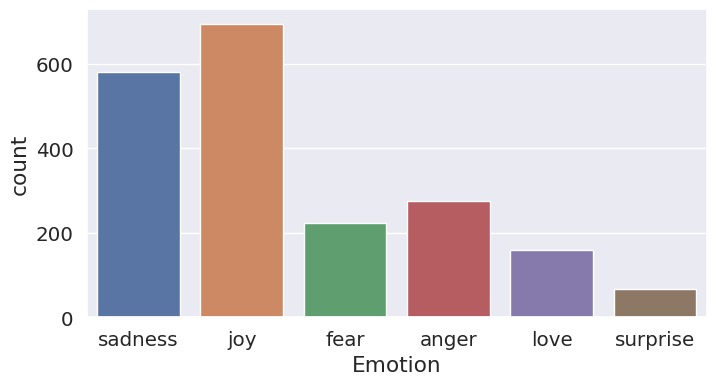

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_test);

In [ ]:
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
#Count the number of stopwords in the data
temp =df_test.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: stop_words, dtype: int64

<Axes: ylabel='Frequency'>

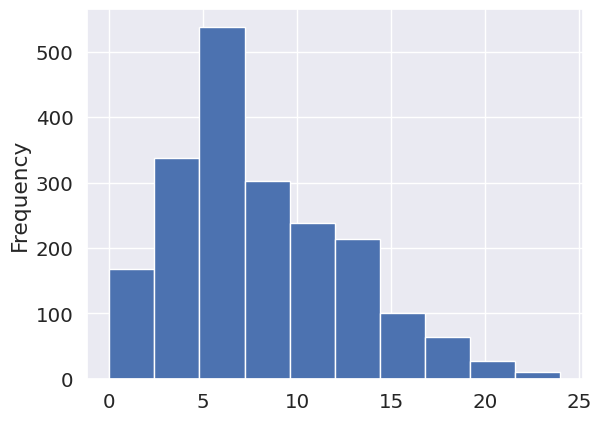

In [ ]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist')

# **Data Cleaning**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [ ]:
normalized_sentence("My Name is sarthak. @Tweets,  plays 2022  Egypt_")

'name sarthak tweet play egypt'

In [ ]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

In [ ]:
X_train = df_train['Text'].values
y_train = df_train['Emotion'].values

X_test = df_test['Text'].values
y_test = df_test['Emotion'].values

X_val = df_val['Text'].values
y_val = df_val['Emotion'].values

MODEL

In [ ]:
def train_model(model, data, targets):
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

In [ ]:
def get_F1(trained_model,X,y):
    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    # Return the F1 score
    return f1

In [ ]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In [ ]:
#Convert the class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print(y_train)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [ ]:

X_train_list = [str(sentence) for sentence in X_train]
X_test_list = [str(sentence) for sentence in X_test]

# Concatenate the lists
all_text = X_train_list + X_test_list

# Tokenize words
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(all_text)

In [ ]:
tokenizer.document_count

17969

In [ ]:
#print the index of a single word
tokenizer.word_index['towards']

220

In [ ]:
#converting a single sentence to list of indexes
tokenizer.texts_to_sequences(X_train[0].split())

[[53], [2], [531]]

In [ ]:
#convert the list of indexes into a matrix of ones and zeros (BOW)
tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#the sentence contains three words and the size of the vocabulary is 14325
tokenizer.texts_to_matrix(X_train[0].split()).shape

(3, 14325)

In [ ]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

# **Padding**

In [ ]:
df_test.shape

(2000, 2)

In [ ]:
maxlen = max([len(t) for t in df_train['Text']])
maxlen

229

In [ ]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 14325


In [ ]:
#before
sequences_train[0]

[53, 2, 531]

In [ ]:
#after
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
path_to_glove_file = '/content/glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200 #latent factors or features
hits = 0
misses = 0
embeddings_index = {}

In [ ]:
# Read word vectors
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 13243 words (1081 misses)


# **LSTM**

In [ ]:
adam2 = Adam(learning_rate=0.005)

model2 = Sequential()
model2.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model2.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=adam2, metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 229, 200)          2865000   
                                                                 
 lstm_3 (LSTM)               (None, 229, 256)          467968    
                                                                 
 lstm_4 (LSTM)               (None, 229, 128)          197120    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 3662446 (13.97 MB)
Trainable params: 797446 (3.04 MB)
Non-trainable params: 2865000 (10.93 MB)
_________________________________________________________________


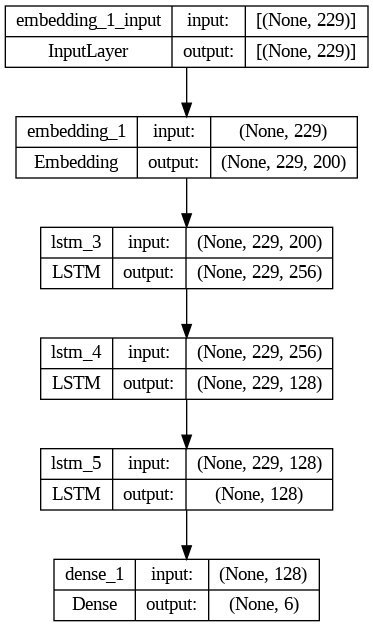

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, show_shapes=True)

In [ ]:
#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [ ]:
# Fit model
history = model2.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callback]
                   )

Epoch 1/30
63/63 [==============================] - 216s 3s/step - loss: 1.2111 - accuracy: 0.5561 - val_loss: 0.6412 - val_accuracy: 0.7825
Epoch 2/30
63/63 [==============================] - 209s 3s/step - loss: 0.4899 - accuracy: 0.8302 - val_loss: 0.2851 - val_accuracy: 0.8970
Epoch 3/30
63/63 [==============================] - 208s 3s/step - loss: 0.2524 - accuracy: 0.9036 - val_loss: 0.1859 - val_accuracy: 0.9250
Epoch 4/30
63/63 [==============================] - 206s 3s/step - loss: 0.1653 - accuracy: 0.9274 - val_loss: 0.1588 - val_accuracy: 0.9265
Epoch 5/30
63/63 [==============================] - 201s 3s/step - loss: 0.1269 - accuracy: 0.9427 - val_loss: 0.1330 - val_accuracy: 0.9390
Epoch 6/30
63/63 [==============================] - 201s 3s/step - loss: 0.1152 - accuracy: 0.9445 - val_loss: 0.1301 - val_accuracy: 0.9325
Epoch 7/30
63/63 [==============================] - 200s 3s/step - loss: 0.0997 - accuracy: 0.9518 - val_loss: 0.1320 - val_accuracy: 0.9360
Epoch 8/30
63

In [ ]:
#print the overall loss and accuracy
model2.evaluate(X_val, y_val, verbose=1)

63/63 [==============================] - 12s 191ms/step - loss: 0.1301 - accuracy: 0.9325


[0.13012072443962097, 0.9325000047683716]

In [ ]:
#print the overall loss and accuracy
model2.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 17s 266ms/step - loss: 0.1333 - accuracy: 0.9375


[0.13328424096107483, 0.9375]

In [ ]:
predicted = model2.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['Emotion']), y_pred))

63/63 [==============================] - 12s 177ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       275
           1       0.88      0.95      0.91       224
           2       0.96      0.94      0.95       695
           3       0.86      0.86      0.86       159
           4       0.96      0.98      0.97       581
           5       0.85      0.71      0.78        66

    accuracy                           0.94      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.94      0.94      0.94      2000



In [ ]:
# Classify custom sample

sentences = [
            "Koparde is very bad boy.",
            "Your point on this certain matter made me outrageous, how can you say so? This is insane.",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]
for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model2.predict(sentence))
    print(f"{result} : {proba}\n\n")

Koparde is very bad boy.
1/1 [==============================] - 0s 405ms/step
anger : 0.5342922806739807


Your point on this certain matter made me outrageous, how can you say so? This is insane.
1/1 [==============================] - 0s 421ms/step
fear : 0.6160174608230591


I can't do it, I'm not ready to lose anything, just leave me alone
1/1 [==============================] - 0s 177ms/step
sadness : 0.47028398513793945


Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
1/1 [==============================] - 0s 176ms/step
surprise : 0.5660139918327332




# **Bidirectional LSTM**

In [ ]:
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 229, 200)          2865000   
                                                                 
 bidirectional (Bidirection  (None, 229, 512)          935936    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 229, 256)          656384    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                        

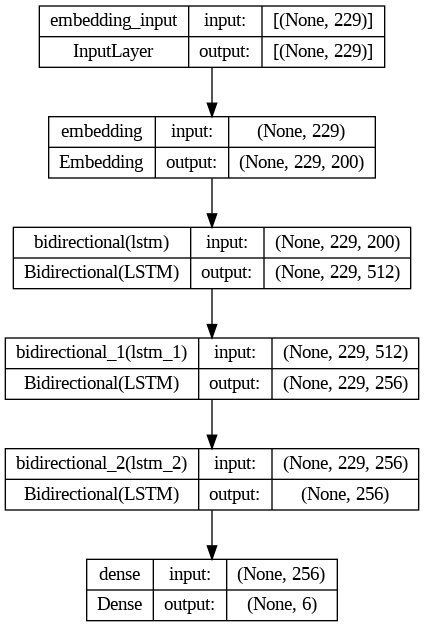

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [ ]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callback]
                   )

Epoch 1/30
63/63 [==============================] - 409s 6s/step - loss: 1.2738 - accuracy: 0.5181 - val_loss: 0.7449 - val_accuracy: 0.7395
Epoch 2/30
63/63 [==============================] - 378s 6s/step - loss: 0.5340 - accuracy: 0.8071 - val_loss: 0.2887 - val_accuracy: 0.8920
Epoch 3/30
63/63 [==============================] - 374s 6s/step - loss: 0.2447 - accuracy: 0.9032 - val_loss: 0.1844 - val_accuracy: 0.9250
Epoch 4/30
63/63 [==============================] - 379s 6s/step - loss: 0.1526 - accuracy: 0.9336 - val_loss: 0.1625 - val_accuracy: 0.9265
Epoch 5/30
63/63 [==============================] - 379s 6s/step - loss: 0.1167 - accuracy: 0.9445 - val_loss: 0.1399 - val_accuracy: 0.9345
Epoch 6/30
63/63 [==============================] - 377s 6s/step - loss: 0.0967 - accuracy: 0.9538 - val_loss: 0.1397 - val_accuracy: 0.9380
Epoch 7/30
63/63 [==============================] - 381s 6s/step - loss: 0.0921 - accuracy: 0.9557 - val_loss: 0.1375 - val_accuracy: 0.9355
Epoch 8/30
63

In [ ]:
#print the overall loss and accuracy
model.evaluate(X_val, y_val, verbose=1)

63/63 [==============================] - 27s 423ms/step - loss: 0.1375 - accuracy: 0.9355


[0.1375463306903839, 0.9355000257492065]

In [ ]:
#print the overall loss and accuracy
model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 28s 442ms/step - loss: 0.1606 - accuracy: 0.9295


[0.16059158742427826, 0.9294999837875366]

In [ ]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['Emotion']), y_pred))

63/63 [==============================] - 27s 384ms/step
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       275
           1       0.89      0.92      0.91       224
           2       0.96      0.92      0.94       695
           3       0.79      0.93      0.85       159
           4       0.95      0.99      0.97       581
           5       0.80      0.62      0.70        66

    accuracy                           0.93      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.93      0.93      0.93      2000



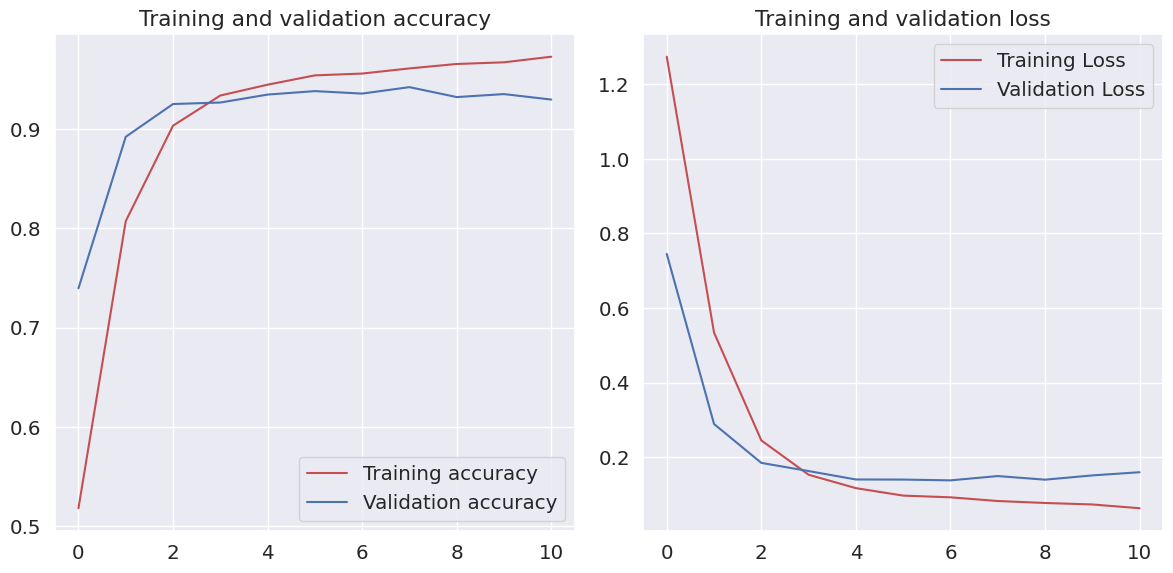

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming history is defined and contains the training history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Set the size of the figures to be horizontal
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Training and Validation Accuracy
axes[0].plot(epochs, acc, 'r', label='Training accuracy')
axes[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
axes[0].set_title('Training and validation accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(epochs, loss, 'r', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and validation loss')
axes[1].legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Classify custom sample

sentences = [
            "Koparde is very bad boy.",
            "Your point on this certain matter made me outrageous, how can you say so? This is insane.",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]
for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

Koparde is very bad boy.
1/1 [==============================] - 1s 1s/step
anger : 0.39842337369918823


Your point on this certain matter made me outrageous, how can you say so? This is insane.
1/1 [==============================] - 1s 1s/step
fear : 0.39690515398979187


I can't do it, I'm not ready to lose anything, just leave me alone
1/1 [==============================] - 1s 550ms/step
sadness : 0.5997160077095032


Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
1/1 [==============================] - 1s 558ms/step
surprise : 0.9852235317230225




In [ ]:
sentence= 'my old brother is dead'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

my old brother is dead
1/1 [==============================] - 0s 330ms/step
sadness : 0.9945700764656067




In [ ]:
sentence= 'Im feeling sad today'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

Im feeling sad today
1/1 [==============================] - 1s 658ms/step
sadness : 0.9995751976966858




In [ ]:
model.save('Emotion Recognition From English text.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
analysis = pd.DataFrame({'Model': ['LSTM','Bidirectional_LSTM'],
                         'Optimizer': ['Adam','Adam'],
                         'Train_Accuracy': ['0.9624','0.9726'],
                         'Val_Accuracy': ['0.9325','0.9355'],
                         'Test_Accuracy': ['0.9374','0.9294']})
analysis

,Model,Optimizer,Train_Accuracy,Val_Accuracy,Test_Accuracy
0,LSTM,Adam,0.9624,0.9325,0.9374
1,Bidirectional_LSTM,Adam,0.9726,0.9355,0.9294
